In [3]:
import geopandas as gpd
from shapely.geometry import Point
import os

In [4]:
# Step 1: Define your data
city_names = ['Nairobi', 'Mombasa', 'Kisumu']
populations = [4397073, 1208333, 610082]
coordinates = [(36.8219, -1.2921), (39.6682, -4.0435), (34.7594, -0.0917)]  # (lon, lat)

In [5]:
# Step 2: Create a point geometry for each city
geometry = [Point(lon, lat) for lon, lat in coordinates]

In [6]:
geometry

[<POINT (36.822 -1.292)>, <POINT (39.668 -4.044)>, <POINT (34.759 -0.092)>]

In [7]:
type(geometry[0])

shapely.geometry.point.Point

In [8]:
# Step 3: Create a GeoDataFrame
gdf = gpd.GeoDataFrame({
    'City': city_names,
    'Population': populations,
    'geometry': geometry
})

In [10]:
gdf

,City,Population,geometry
0,Nairobi,4397073,POINT (36.8219 -1.2921)
1,Mombasa,1208333,POINT (39.6682 -4.0435)
2,Kisumu,610082,POINT (34.7594 -0.0917)


In [11]:
gdf.crs

In [12]:
# Step 4: Set the coordinate reference system (CRS)
gdf.set_crs(epsg=4326, inplace=True)  # WGS 84

,City,Population,geometry
0,Nairobi,4397073,POINT (36.8219 -1.2921)
1,Mombasa,1208333,POINT (39.6682 -4.0435)
2,Kisumu,610082,POINT (34.7594 -0.0917)


In [13]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [14]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# Step 5: Save the GeoDataFrame to a shapefile
output_dir = 'data/output'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'cities.shp')
gdf.to_file(output_path, driver='ESRI Shapefile')
print("✅ Shapefile created at: data/output/kenyan_cities.shp")

✅ Shapefile created at: data/output/kenyan_cities.shp


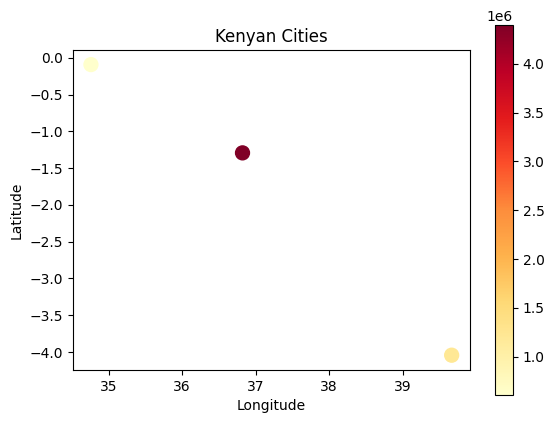

In [22]:
# Plot the GeoDataFrame
import matplotlib.pyplot as plt
gdf.plot(column="Population", cmap="YlOrRd", legend=True, markersize=100)
plt.title('Kenyan Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

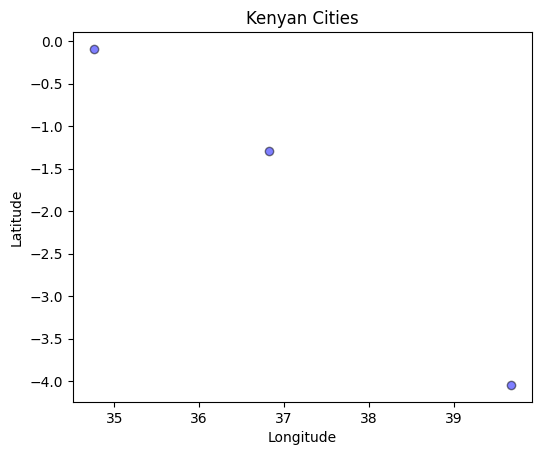

In [27]:
gdf.geometry.plot(color='blue', alpha=0.5, edgecolor='k')
# gdf.plot(color='blue', alpha=0.5, edgecolor='k') # both options work
plt.title('Kenyan Cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

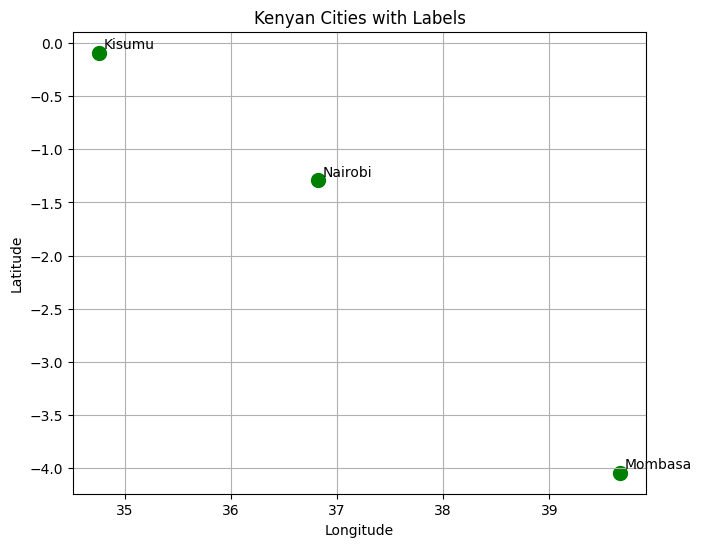

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the points
gdf.plot(ax=ax, color='green', markersize=100)

# Add labels
for idx, row in gdf.iterrows():
    ax.annotate(row['City'], xy=(row.geometry.x, row.geometry.y), xytext=(3, 3), textcoords="offset points")

plt.title("Kenyan Cities with Labels")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()